In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number

from src.function_helper import FunctionHelper, Quadratic

In [3]:
test_func = FunctionHelper(
    f = lambda x: 3 * x**2 + 2 * x + 1,
    g = lambda x: 6 * x + 2,
    h = lambda x: np.array([6])
)

test_func_2 = FunctionHelper(
    f = lambda x: x + 6,
    g = lambda x: np.array([1]),
    h = lambda x: np.array([0])
)

test_func_3 = test_func + test_func_2
test_func_4 = test_func * test_func_2

test_func_5 = FunctionHelper(
    f = lambda x: 3 * x**3 + 20 * x**2 + 13 * x + 6,
    g = lambda x: 9 * x**2 + 40 * x + 13,
    h = lambda x: 18 * x + 40
)

test_func_6 = 3 * test_func
test_func_7 = test_func + 3

In [4]:
x = np.array([2])
test_func(x), test_func_2(x), test_func_3(x), test_func_4(x), test_func_5(x), \
    test_func(x) * test_func_2(x)

(array([17]),
 array([8]),
 array([25]),
 array([136]),
 array([136]),
 array([136]))

In [42]:
x = np.array([2])
test_func.g(x), test_func_2.g(x), test_func_3.g(x), test_func_4.g(x), test_func_5.g(x)

(array([14]), array([1]), array([15]), array([129]), array([129]))

In [43]:
x = np.array([2])
test_func.h(x), test_func_2.h(x), test_func_3.h(x), test_func_4.h(x), test_func_5.h(x)

(array([6]), array([0]), array([6]), array([76]), array([76]))

In [12]:
Q = np.array([[1, 2], [2, 4]])
p = np.array([1, -1])

test_func = Quadratic(Q=Q, p=p)

test_func_2 = test_func + 10
test_func_3 = test_func * 2

In [13]:
x = np.array([2, 1])
test_func(x), test_func_2(x), test_func_3(x)

(17, 27, 34)

In [14]:
x = np.array([2, 1])
test_func.g(x), test_func_2.g(x), test_func_3.g(x)

(array([ 9, 15]), array([ 9, 15]), array([18, 30]))

In [15]:
x = np.array([2, 1])
test_func.h(x), test_func_2.h(x), test_func_3.h(x)

(array([[2, 4],
        [4, 8]]),
 array([[2, 4],
        [4, 8]]),
 array([[ 4,  8],
        [ 8, 16]]))

In [20]:
x = np.array([[1, 2], [1, 2], [1, 2]])
y = np.array([1, 2, 3])
res = x * np.transpose(np.array([y,]*2))


In [23]:
[y,]*2

[array([1, 2, 3]), array([1, 2, 3])]

In [39]:
t_range = (-11, 10)
x0 = np.array([0, 0]).reshape(-1, 1)
direction = np.array([1, 1]).reshape(-1, 1)

In [52]:
tmp = ([t_range[0]]* x0.shape[0], [t_range[1]] * x0.shape[0])
ts = np.linspace(*tmp, 1000).T

In [56]:
res = x0 + ts * direction

In [70]:
t_plot = np.linspace(*t_range, 1000)

In [85]:
res.shape

(2, 1000)

In [92]:
np.apply_along_axis(test_func, 0, res)

(1000,)

In [82]:
np.repeat(t_plot.reshape(-1, 1), 3, axis=1).T

array([[-11.        , -10.97897898, -10.95795796, ...,   9.95795796,
          9.97897898,  10.        ],
       [-11.        , -10.97897898, -10.95795796, ...,   9.95795796,
          9.97897898,  10.        ],
       [-11.        , -10.97897898, -10.95795796, ...,   9.95795796,
          9.97897898,  10.        ]])

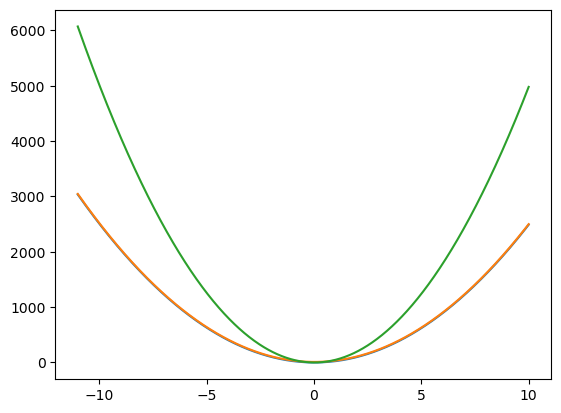

In [96]:
fig, ax = plt.subplots()
t_range = (-11, 10)
x0 = np.array([0, 0])
direction = np.array([1, 2])

test_func.plot_line(x0, direction, t_range, ax=ax)
test_func_2.plot_line(x0, direction, t_range, ax=ax)
test_func_3.plot_line(x0, direction, t_range, ax=ax)

In [54]:
y.shape

(1000,)